In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore",category=RuntimeWarning)

bike_df=pd.read_csv('./bike_train.csv')
print(bike_df.shape)
bike_df.head()


(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 0:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 1:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 2:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 3:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 4:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [2]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [3]:
print(bike_df.columns)

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')


In [4]:
# 문자열을 datetime 타입으로 변경 
import pandas as pd
bike_df['datetime'] = bike_df.datetime.apply(pd.to_datetime) 

#datetime 타입에서 년, 월, 일, 시간 추출
bike_df['year']=bike_df.datetime.apply(lambda x: x.year)
bike_df['month']=bike_df.datetime.apply(lambda x:x.month)
bike_df['day']=bike_df.datetime.apply(lambda x:x.day)
bike_df['hour']=bike_df.datetime.apply(lambda x:x.hour)
bike_df.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2


In [5]:
print(bike_df.columns)
drop_columns=['datetime', 'casual', 'registered']
bike_df.drop(drop_columns, axis=1, inplace=True)

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'year', 'month', 'day', 'hour'],
      dtype='object')


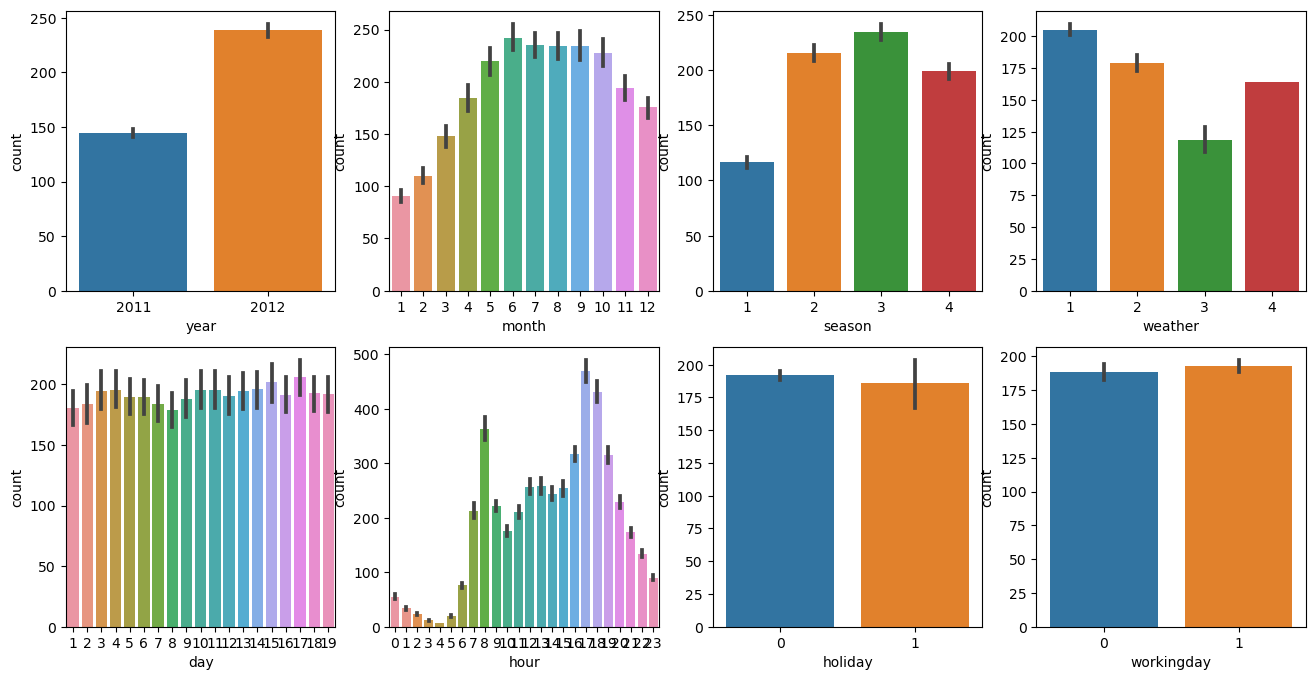

In [6]:
fig, axs = plt.subplots(figsize=(16, 8), ncols=4, nrows=2) 
cat_features = ['year','month','season' ,'weather','day','hour','holiday','workingday'] 
# cat_features어| 있는 모든 칼럼 별로 개 별 칼럼 값에 따른 count의 합을 barp10t으로 시 각화 
for i , feature in enumerate(cat_features): 
    row = int(i/4) 
    col = i%4 
#시본의 barp10t을 이용해 칼럼 값에 따른 count의 합을 표현sns.barp10t(x=feature, y='count’, data=bike_df, ax=axs[row][co1]) 
    sns.barplot(x=feature, y='count', data=bike_df,ax=axs[row][col])

In [7]:
from sklearn.metrics import mean_squared_error, mean_absolute_error 
# 10g 값 변환 시 NaN 등의 이슈로 10g()가 아닌 10g1 p()를 이용해 RMSLE 계산 
def rmsle(y, pred): 
    log_y = np.log1p(y) 
    log_pred = np.log1p(pred) 
    squared_error = (log_y - log_pred) ** 2 
    rmsle = np.sqrt(np.mean(squared_error)) 
    return rmsle 
# 사이킷런의 mean_square_error()를 이용해 RMSE 계산 
def rmse(y, pred): 
    return np.sqrt(mean_squared_error(y, pred))
# MSE , RMSE , RMSLE를 모두 계산 
def evaluate_regr(y, pred) : 
    rmsle_val = rmsle(y, pred) 
    rmse_val = rmse(y , pred) 
# MAE는 사이킷런의 mean_abso1ute_error()로 계산 
    mae_val = mean_absolute_error(y, pred) 
    print('RMSLE : {0:.3f}, RMSE: {1:.3F}, MAE : {2:.3F}'.format(rmsle_val , rmse_val , mae_val))

In [8]:
# 다음과 같은 rms1e 구현은 오버플로나 언더플로 오류를 발생하기 쉽습니다. 
#def rmsle(y, pred) : 
#    msle = mean_squared_log_error(y_pred) 
#    rmsle = np.sqrt(mse) 
#    return rmsle 

In [9]:
from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.linear_model import LinearRegression, Ridge, Lasso 

y_target = bike_df['count'] 
X_features = bike_df.drop(['count'], axis=1 , inplace=False) 

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.3,random_state=0) 

lr_reg = LinearRegression() 
lr_reg.fit(X_train, y_train) 
pred = lr_reg.predict(X_test) 

evaluate_regr(y_test, pred)

RMSLE : 1.165, RMSE: 140.900, MAE : 105.924


In [10]:
def get_top_error_data(y_test, pred, n_tops = 5):
    result_df = pd.DataFrame(y_test .values, columns=['real_count']) 
    result_df['predicted_count']= np.round(pred)
    result_df['diff']=np.abs(result_df['real_count']-result_df['predicted_count'])
    print(result_df.sort_values('diff', ascending=False)[:n_tops])
    
get_top_error_data(y_test,pred,n_tops=5)

      real_count  predicted_count   diff
1618         890            322.0  568.0
3151         798            241.0  557.0
966          884            327.0  557.0
412          745            194.0  551.0
2817         856            310.0  546.0


<Axes: >

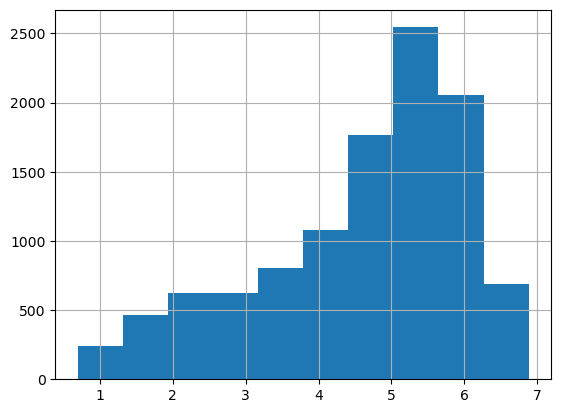

In [11]:
y_log_transform = np.log1p(y_target) 
y_log_transform.hist() 

In [14]:
# 타깃 칼럼 인 count 값을 log1p로 로그 변환 
y_target_log = np.log1p(y_target) 
# 로그 변환된 y_target_log를 반영해 학습/테스트 데이터 세트 분할 
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target_log, test_size=0.3, 
random_state=0) 
lr_reg = LinearRegression() 
lr_reg.fit(X_train, y_train) 
pred = lr_reg.predict(X_test) 
# 테스트 데이터 세트의 Target 값은 로그 변환됐으므로 다시 expm1을 이용해 원래 스케일로 변환 
y_test_exp = np.expm1(y_test)
# 예측값 역시 로그 변환된 타깃 기반으로 학습돼 예측됐으므로 다시 expm1로 스케일 변환 
pred_exp = np.expm1(pred) 
evaluate_regr(y_test_exp, pred_exp)

RMSLE : 1.017, RMSE: 162.594, MAE : 109.286


<Axes: >

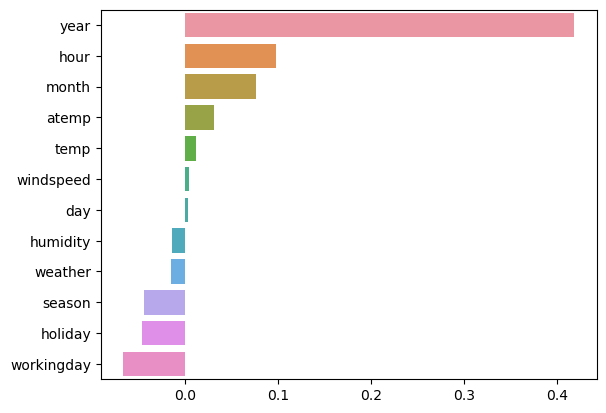

In [15]:
coef = pd.Series(lr_reg.coef_, index=X_features .columns) 
coef_sort = coef.sort_values(ascending=False) 
sns.barplot(x=coef_sort.values, y=coef_sort.index)

In [19]:
# 'year' , month ', ’day ‘ , hour'등의 피처들을 One Hot Encoding 
X_features_ohe = pd.get_dummies(X_features, columns=[ 'year','month','day','hour','holiday','workingday','season', 'weather']) 

In [21]:

# 원-핫 인코딩이 적용된 피처 데이터 세트 기반으로 학습/예측 데이터 분할. 
X_train , X_test , y_train, y_test = train_test_split(X_features_ohe, y_target_log, test_size=0.3, random_state=0) 
# 모델과 학습/테스트 데이터 세트를 입력하면 성능 평가 수치를 반환
def get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1=False): 
    model.fit(X_train, y_train) 
    pred = model.predict(X_test) 
    if is_expm1 : 
        y_test = np.expm1(y_test) 
        pred = np.expm1(pred) 
    print( '###', model.__class__.__name__, '###') 
    evaluate_regr(y_test, pred) 
# end of function get_model_predict 

# 모델별로 평가 수행 
lr_reg = LinearRegression() 
ridge_reg = Ridge(alpha=10) 
lasso_reg = Lasso(alpha=0.01 ) 
for model in [lr_reg, ridge_reg, lasso_reg]: 
    get_model_predict(model,X_train, X_test, y_train, y_test,is_expm1=True)

### LinearRegression ###
RMSLE : 0.590, RMSE: 97.690, MAE : 63.383
### Ridge ###
RMSLE : 0.590, RMSE: 98.529, MAE : 63.893
### Lasso ###
RMSLE : 0.635, RMSE: 113.219, MAE : 72.803


<Axes: >

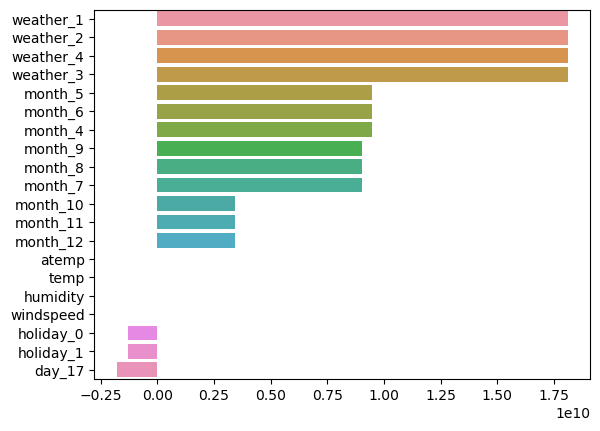

In [23]:
coef = pd.Series(lr_reg.coef_ , index=X_features_ohe.columns) 
coef_sort = coef.sort_values(ascending=False)[:20] 
sns.barplot(x=coef_sort.values , y=coef_sort.index) 

In [29]:
from sklearn .ensemble import RandomForestRegressor, GradientBoostingRegressor 
from xgboost import XGBRegressor 
from lightgbm import LGBMRegressor 
# 랜덤 포레스트， GBM, XGBoost, LightGBM model별로 평가 수행 
rf_reg = RandomForestRegressor(n_estimators=500) 
gbm_reg = GradientBoostingRegressor(n_estimators=500) 
xgb_reg = XGBRegressor(n_estimators=500)
lgbm_reg = LGBMRegressor(n_estimators=500) 
for model in [rf_reg, gbm_reg, xgb_reg, lgbm_reg]: 
    # XGBoost의 경우 DataFrameol 입력될 경우 버전에 따라 오류 발생 가능. ndarray로 변환. 
    get_model_predict(model,X_train.values, X_test.values , y_train.values, y_test.values,is_expm1=True) 

### RandomForestRegressor ###
RMSLE : 0.354, RMSE: 50.344, MAE : 31.116
### GradientBoostingRegressor ###
RMSLE : 0.330, RMSE: 53.336, MAE : 32.747
### XGBRegressor ###
RMSLE : 0.339, RMSE: 51.475, MAE : 31.357
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000404 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 348
[LightGBM] [Info] Number of data points in the train set: 7620, number of used features: 72
[LightGBM] [Info] Start training from score 4.582043
### LGBMRegressor ###
RMSLE : 0.319, RMSE: 47.215, MAE : 29.029
